# **Take-Home Assignment 02**

## 1. Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one for the background). Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.

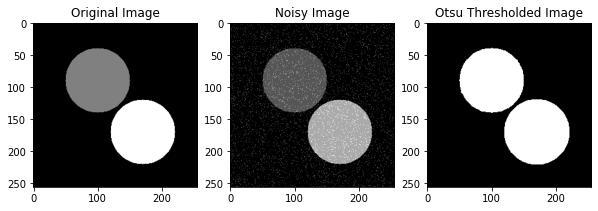

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Create an image with 2 circles and a total of 3-pixel values
img = np.zeros((256, 256), dtype=np.uint8)
cv2.circle(img, (100, 90), 50, 1, -1)
cv2.circle(img, (170, 170), 50, 2, -1)

# Add Gaussian noise to the image
noise=np.zeros((256,256),dtype=np.uint8)
cv2.randn(noise,0.6,0.6)
noise=(noise*0.5).astype(np.uint8)
noisy_img = noise +  img

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noisy_img,(5,5),0)
threshold_value, thresholded_img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(noisy_img, cmap='gray')
axs[1].set_title('Noisy Image')
axs[2].imshow(thresholded_img, cmap='gray')
axs[2].set_title('Otsu Thresholded Image')

plt.show()


## 2. Implement a region-growing technique for image segmentation. The basic idea is to start from a set of points inside the object of interest (foreground), denoted as seeds, and recursively add neighboring pixels as long as they are in a pre-defined range of the pixel values of the seeds.

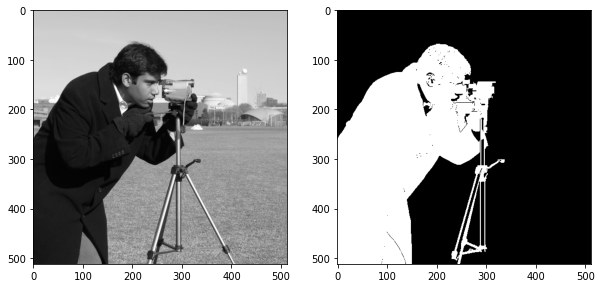

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

img = data.camera()

mask = np.zeros_like(img)

seeds = [(200, 200)]

threshold = 16

# mark every seed point in mask as 1
for seed in seeds:
    mask[seed[0], seed[1]] = 1

# 4 connected neighbors
neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]

for seed in seeds:
    for neighbor in neighbors:
        coord = {
            'x': seed[0] + neighbor[0],
            'y': seed[1] + neighbor[1]
        }

        # check if the neighbor is out of bounds
        if coord['x'] < 0 or coord['x'] >= img.shape[0] or coord['y'] < 0 or coord['y'] >= gray.shape[1]:
            continue

        # check if the neighbor is already marked
        if mask[coord['x'], coord['y']] != 0:
            continue

        # check if the neighbor is within the threshold
        if img[coord['x'], coord['y']] >= (img[seed[0], seed[1]] - threshold) and img[coord['x'], coord['y']] <= (img[seed[0], seed[1]] + threshold):
            mask[coord['x'], coord['y']] = 1
            seeds.append((coord['x'], coord['y']))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(mask, cmap='gray')
plt.show()